<a href="https://colab.research.google.com/github/trong-khanh-1109/CS114.L22.KHCL/blob/main/Preprocess_and_split_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
folder = '/content/drive/MyDrive/Data_Final_Project/data'

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import cv2
from imutils import contours
import numpy as np

In [ ]:
print(sorted(os.listdir(folder)))

['a', 'à', 'á', 'â', 'ầ', 'ấ', 'ẫ', 'ẩ', 'ã', 'ă', 'ằ', 'ắ', 'ẵ', 'ẳ', 'ả', 'ạ', 'ậ', 'ặ', 'b', 'c', 'd', 'e', 'è', 'é', 'ê', 'ề', 'ế', 'ễ', 'ể', 'ẽ', 'ẻ', 'ẹ', 'ệ', 'g', 'h', 'i', 'ì', 'í', 'ĩ', 'ỉ', 'ị', 'k', 'l', 'm', 'n', 'o', 'ò', 'ó', 'ô', 'ồ', 'ố', 'ỗ', 'ổ', 'õ', 'ỏ', 'ơ', 'ờ', 'ớ', 'ỡ', 'ở', 'ợ', 'ọ', 'ộ', 'p', 'q', 'r', 's', 't', 'u', 'ù', 'ú', 'ũ', 'ủ', 'ư', 'ừ', 'ứ', 'ữ', 'ử', 'ự', 'ụ', 'v', 'x', 'y', 'ỳ', 'ý', 'ỹ', 'ỷ', 'ỵ', 'đ']


In [ ]:
list_char = sorted(os.listdir(folder))
len(list_char)

89

In [ ]:
FJoin = os.path.join

In [ ]:
link_to_a_char = [FJoin(folder, f) for f in list_char]
print(link_to_a_char)
print(len(link_to_a_char))

['/content/drive/MyDrive/Data_Final_Project/data/a', '/content/drive/MyDrive/Data_Final_Project/data/à', '/content/drive/MyDrive/Data_Final_Project/data/á', '/content/drive/MyDrive/Data_Final_Project/data/â', '/content/drive/MyDrive/Data_Final_Project/data/ầ', '/content/drive/MyDrive/Data_Final_Project/data/ấ', '/content/drive/MyDrive/Data_Final_Project/data/ẫ', '/content/drive/MyDrive/Data_Final_Project/data/ẩ', '/content/drive/MyDrive/Data_Final_Project/data/ã', '/content/drive/MyDrive/Data_Final_Project/data/ă', '/content/drive/MyDrive/Data_Final_Project/data/ằ', '/content/drive/MyDrive/Data_Final_Project/data/ắ', '/content/drive/MyDrive/Data_Final_Project/data/ẵ', '/content/drive/MyDrive/Data_Final_Project/data/ẳ', '/content/drive/MyDrive/Data_Final_Project/data/ả', '/content/drive/MyDrive/Data_Final_Project/data/ạ', '/content/drive/MyDrive/Data_Final_Project/data/ậ', '/content/drive/MyDrive/Data_Final_Project/data/ặ', '/content/drive/MyDrive/Data_Final_P

#**Đưa ảnh về dạng trắng đen và cắt gọn khoảng trắng xung quanh chữ**

In [ ]:
# Hàm cắt gọn ảnh bằng cách xác định các countours
def crop_images(img):
    blur = cv2.GaussianBlur(img,(7,7),0)
    thresh = cv2.adaptiveThreshold(blur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV,7,7)
    contours = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[0]
    x_min = 10**9
    x_max = 0
    y_min = 10**9
    y_max = 0

    for cnt in contours:
        x, y, width, height = cv2.boundingRect(cnt)
        if cv2.contourArea(cnt) > 0:
            x_min = min(x_min, x)
            y_min = min(y_min, y)

            if x + width > x_max:
                x_max = x + width

            if y + height > y_max:
                y_max = y + height

    table = thresh[y_min: y_max, x_min:x_max]
    return table

In [ ]:
# Chuyển ảnh về trắng đen và cắt gọn ảnh
for link in link_to_a_char:
  lst_link_img = [FJoin(link, img_link) for img_link in os.listdir(link)]
  for img_link in lst_link_img:
    img = cv2.imread(img_link, 0)
    img = crop_images(img)
    try:
      cv2.imwrite(img_link, img)
    except:
      continue

# Duyệt tất cả các ảnh để đổi tên lại theo thứ tự

In [ ]:
for link in link_to_a_char:
  lst_name_img = os.listdir(link)
  for index ,name_img in enumerate(lst_name_img):
    os.chdir(link)
    os.rename(name_img, 'picture_' + str(index) + '.jpg')

#**Resize tất cả ảnh về cùng kích thước**

(40, 71)


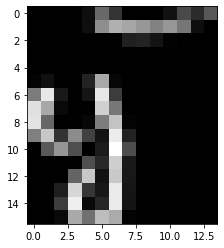

In [ ]:
# Test thử 1 ảnh
link_a_img = os.listdir(char_link[85])
img = Image.open(FJoin(char_link[85], link_a_img[30]))
print(img.size)
img = img.resize((16, 16))
plt.imshow(img, cmap = 'gray')

In [ ]:
for link in link_to_a_char:
  lst_link_img = [FJoin(link, img_link) for img_link in os.listdir(link)]
  for img_link in lst_link_img:
    img = Image.open(img_link)
    img = img.resize((16,16))
    img.save(img_link)

#**Phân chia tập train và validation**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
index = 0
link_to_train = {}
link_to_val = {}

label_to_train = []
label_to_val = []

for f in link_to_a_char:
    list_img_link = [img_link for img_link in os.listdir(f)]
    labels = [index] * len(list_img_link)
    train, validation , train_label, val_label = train_test_split(list_img_link, labels, test_size = 0.2, random_state= 30)

    link_to_train[index] = []
    link_to_val[index] = []
    for i, j in zip(train, train_label):
        link_to_train[index].append(i)
        label_to_train.append(j)
        
    for i, j in zip(validation, val_label):
        link_to_val[index].append(i)
        label_to_val.append(j)
    index += 1

In [ ]:
print(link_to_train)
print(label_to_train)
print(link_to_val)
print(label_to_train)

{0: ['picture_94.jpg', 'picture_188.jpg', 'picture_74.jpg', 'picture_111.jpg', 'picture_165.jpg', 'picture_0.jpg', 'picture_93.jpg', 'picture_90.jpg', 'picture_210.jpg', 'picture_223.jpg', 'picture_22.jpg', 'picture_135.jpg', 'picture_134.jpg', 'picture_106.jpg', 'picture_35.jpg', 'picture_84.jpg', 'picture_187.jpg', 'picture_216.jpg', 'picture_75.jpg', 'picture_63.jpg', 'picture_220.jpg', 'picture_205.jpg', 'picture_148.jpg', 'picture_195.jpg', 'picture_211.jpg', 'picture_76.jpg', 'picture_124.jpg', 'picture_212.jpg', 'picture_88.jpg', 'picture_27.jpg', 'picture_178.jpg', 'picture_170.jpg', 'picture_138.jpg', 'picture_127.jpg', 'picture_215.jpg', 'picture_28.jpg', 'picture_23.jpg', 'picture_181.jpg', 'picture_36.jpg', 'picture_159.jpg', 'picture_1.jpg', 'picture_199.jpg', 'picture_79.jpg', 'picture_137.jpg', 'picture_121.jpg', 'picture_128.jpg', 'picture_152.jpg', 'picture_225.jpg', 'picture_202.jpg', 'picture_185.jpg', 'picture_109.jpg', 'picture_101.jpg', 'picture_183.jpg', 'picture

>Lưu bộ dữ liệu train vào foler Train

In [ ]:
train_folder = '/content/drive/My Drive/Data_Final_Project/Train'
train_folder_character = [FJoin(train_folder, f) for f in list_char]
print(train_folder_character)

['/content/drive/My Drive/Data_Final_Project/Train/a', '/content/drive/My Drive/Data_Final_Project/Train/à', '/content/drive/My Drive/Data_Final_Project/Train/á', '/content/drive/My Drive/Data_Final_Project/Train/â', '/content/drive/My Drive/Data_Final_Project/Train/ầ', '/content/drive/My Drive/Data_Final_Project/Train/ấ', '/content/drive/My Drive/Data_Final_Project/Train/ẫ', '/content/drive/My Drive/Data_Final_Project/Train/ẩ', '/content/drive/My Drive/Data_Final_Project/Train/ã', '/content/drive/My Drive/Data_Final_Project/Train/ă', '/content/drive/My Drive/Data_Final_Project/Train/ằ', '/content/drive/My Drive/Data_Final_Project/Train/ắ', '/content/drive/My Drive/Data_Final_Project/Train/ẵ', '/content/drive/My Drive/Data_Final_Project/Train/ẳ', '/content/drive/My Drive/Data_Final_Project/Train/ả', '/content/drive/My Drive/Data_Final_Project/Train/ạ', '/content/drive/My Drive/Data_Final_Project/Train/ậ', '/content/drive/My Drive/Data_Final_Project/Train/ặ', 

In [ ]:
for f in train_folder_character:
    os.makedirs(f)

In [ ]:
for i in range(89): # Duyệt qua tất cả class
    list_img = [FJoin(link_to_a_char[i], f) for f in link_to_train[i]] # Lấy link những ảnh dùng cho tập train
    save_path = [FJoin(train_folder_character[i],f) for f in link_to_train[i]] # Lấy link tập train
    for link_open, link_save in zip(list_img, save_path):
        img = Image.open(link_open)
        img.save(link_save)

In [ ]:
list_img

>Lưu bộ dữ liệu validation vào folder Validation

In [ ]:
val_folder = '/content/drive/MyDrive/Data_Final_Project/Validation'
val_folder_character = [FJoin(val_folder, f) for f in list_img]
print(val_folder_character)

['/content/drive/MyDrive/Data_Final_Project/data/đ/picture_4.jpg', '/content/drive/MyDrive/Data_Final_Project/data/đ/picture_24.jpg', '/content/drive/MyDrive/Data_Final_Project/data/đ/picture_32.jpg', '/content/drive/MyDrive/Data_Final_Project/data/đ/picture_48.jpg', '/content/drive/MyDrive/Data_Final_Project/data/đ/picture_7.jpg', '/content/drive/MyDrive/Data_Final_Project/data/đ/picture_87.jpg', '/content/drive/MyDrive/Data_Final_Project/data/đ/picture_34.jpg', '/content/drive/MyDrive/Data_Final_Project/data/đ/picture_3.jpg', '/content/drive/MyDrive/Data_Final_Project/data/đ/picture_8.jpg', '/content/drive/MyDrive/Data_Final_Project/data/đ/picture_67.jpg', '/content/drive/MyDrive/Data_Final_Project/data/đ/picture_124.jpg', '/content/drive/MyDrive/Data_Final_Project/data/đ/picture_82.jpg', '/content/drive/MyDrive/Data_Final_Project/data/đ/picture_117.jpg', '/content/drive/MyDrive/Data_Final_Project/data/đ/picture_88.jpg', '/content/drive/MyDrive/Data_Final_Project/data/đ/picture_15.jp

In [ ]:
for f in val_folder_character:
    os.makedirs(f)

In [ ]:
for i in range(89): # Duyệt qua tất cả class
    list_val_img = [FJoin(link_to_a_char[i], f) for f in link_to_val[i]] # Lấy link những ảnh dùng cho tập validation
    save_path = [FJoin(val_folder_character[i],f) for f in link_to_val[i]]# Lấy link tập validation
    for link_open, link_save in zip(list_val_img, save_path):
        img = Image.open(link_open)
        img.save(link_save)